[*********************100%***********************]  1 of 1 completed
3271    3845.900528
3272    3845.571496
3273    3842.028685
3274    3844.133338
3275    3843.232019
3276    3843.639007
3277    3843.677191
3278    3843.534853
3279    3843.631932
3280    3843.575874
Name: predicted_mean, dtype: float64


/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given wit

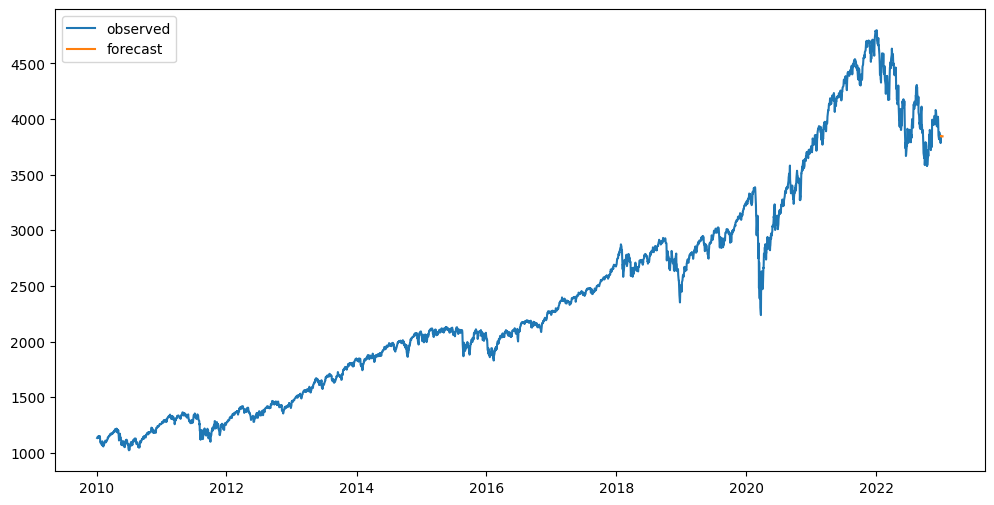

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

# Yahoo FinanceからS&P500のデータを取得
yf.pdr_override()
df = pdr.get_data_yahoo('^GSPC', start='2010-01-01', end='2023-01-01')

# 終値のみを使用
closing_prices = df['Close']

# モデルのパラメータ設定 (p=5, d=1, q=0) これらの値はデータによります。
model = ARIMA(closing_prices, order=(5,1,0))

# モデルのフィット
model_fit = model.fit()

# 予測の実行 (次の10日間を予測)
forecast = model_fit.forecast(steps=10)

# 予測結果の表示
print(forecast)

# プロット
plt.figure(figsize=(12,6))
plt.plot(closing_prices.index, closing_prices, label='observed')
plt.plot(pd.date_range(closing_prices.index[-1], periods=10, freq='D'), forecast, label='forecast')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given wit

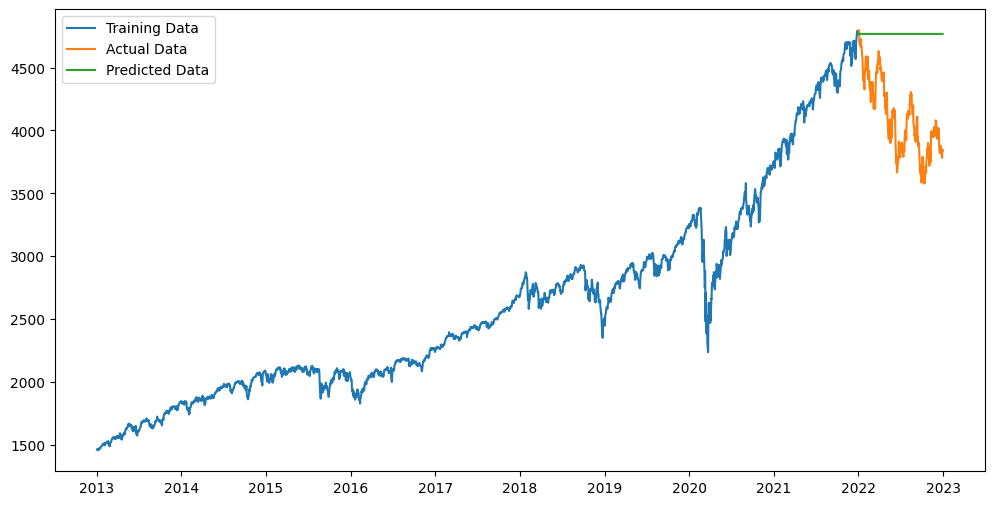

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

# Yahoo FinanceからS&P500の10年分のデータを取得
yf.pdr_override()
df = pdr.get_data_yahoo('^GSPC', start='2013-01-01', end='2023-01-01')

# 終値のみを使用
closing_prices = df['Close']

# 最初の9年間のデータでモデルを訓練
train_data = closing_prices[:'2021-12-31']
test_data = closing_prices['2022-01-01':]

# モデルのパラメータ設定 (p=5, d=1, q=0) これらの値はデータによります。
model = ARIMA(train_data, order=(5,1,0))

# モデルのフィット
model_fit = model.fit()

# 予測の実行 (次の1年間を予測)
forecast = model_fit.forecast(steps=len(test_data))

# プロット
plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, forecast, label='Predicted Data')
plt.legend()
plt.show()
